<h1><center>creating and Orginized Mnist dataset</center></h1>

 1. First download Mnist dataset from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)
 2. Read the dataset to pairs of (x,y), images and labels respectively.
 3. Sort the data and store in dictionary. Each label is a key and its values are matrix of images vector and culomn of the label.
 
 
 <h3><center>---------------Importing modules----------------</center></h3>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist

<h3><center>---------------Defining function----------------</center></h3>

In [6]:
def OrginizeMnistDS (link1, link2):
    """
    The function OrginizeMnistDS is orginize the Mnist dataset from 
    the digit 0 to the digit 9 by using the 'argsort' method from numpy.
    
    The inputs:
              link1 - String type of the path where the data store in local place.
              link2 - String type of the path where the data store in local place.
    
    The outputs:
              y_sort - nd.array of the sorted labels (1-d).
              x-sort - nd.array of the sorted images (2-d).
    """
    x, y = loadlocal_mnist(images_path=link1, labels_path=link2)
    index = np.argsort(y)
    y_sort = y[index]
    x_sort = x[index]
    return y_sort, x_sort

def IndLabels(y, x):
    """
    The function IndLabels is finding the indexes where new label is set in the nd.array input.
    
    The inputs:
              y - nd.array of the soerted labels (1-d).
              x - nd.array of the soerted labels (2-d).
    
    The output:
              temp - list of indexes were change has been apperence.
    """
    temp = [0]
    for i in range(len(y)):
        if y[i] == 9:
            break
        if y[i] != y[i+1]:
            temp.extend([i+1])
    return temp

def DictMnist(y_sort, x_sort):
    """
    The function DictMnist is orginize the Mnist dataset into a dictionary. 
    The dictionary keys are the names of the labels (0, 1, 2..., 9). The values are the images.
    
    The inputs:
              x-sort - nd.array of the sorted images (2-d).
              temp - list which contains the indexes for new label appearence.
    
    The outputs:
              y_sort - nd.array of the sorted labels (1-d).
              x-sort - nd.array of the sorted images (2-d).
    """
    temp = IndLabels(y_sort, x_sort)
    dictMnist = {}
    for i in range(len(temp)):
        if i == len(temp)-1:
            instart = temp[i]
            dictMnist[i] = x_sort[instart:]
            break
        instart = temp[i]
        instop = temp[i+1]
        dictMnist[i] = x_sort[instart:instop]           
    return dictMnist

<h3><center>---------------Mnist dataset: Reading, Sorting and Orginizing in a Dictionary ----------------</center></h3>

In [7]:
# ---------------------------------reading mnist dataset--------------------------
# Enter the link for mnist local-dataset
link1        = 'C:\\matan antebi\\תואר שני\\שנה ד\\סמסטר א\\נושאים מתקדמים בלמידה\\train-images.idx3-ubyte'
link2        = 'C:\\matan antebi\\תואר שני\\שנה ד\\סמסטר א\\נושאים מתקדמים בלמידה\\train-labels.idx1-ubyte'
[y_sort, x_sort] = OrginizeMnistDS(link1, link2)
# ----------------------sorting and orginized the data in dictionary--------------
dMnist = DictMnist(y_sort, x_sort)

<h3><center>---------------Representing digit from each keys from the Dictionary ----------------</center></h3>

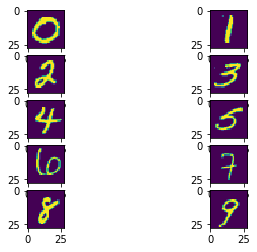

In [32]:
len(dMnist[9][0])
for i in range(len(dMnist.keys())):
    #plt.subplot(int(str(52)+str(i+1)))
    plt.subplot(5,2,(i+1))
    image = dMnist[i][0]
    image = image.reshape(28,28)
    plt.imshow(image)
